In [27]:
from spectrum_image import EELS
from spectrum_image import EELS_util as util
import os
import hyperspy.api as hs
import matplotlib.pyplot as plt
%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
## File and microscope parameters
path = ""

number = "8" # data set number

path += "SI data ({})/".format( number ) #file path for directory with data files
print(os.listdir(path))

SIdm = "STEM SI.dm4" # data file name
darkdm3 = "" # dark reference file name, leave as empty string if none

['Survey.tif', 'ADF.tif', 'STEM SI.dm4', '(8) Picker of STEM SI.dm4']


In [29]:
SI_file=hs.load(path+SIdm)
hs_survey = SI_file[0]
hs_ADF = SI_file[1]
hs_LL = SI_file[2]
hs_HL = SI_file[3]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

In [30]:
survey = hs_survey.data
adf = hs_ADF.data

In [31]:
es_LL, si_LL, pxscale, disp, params = util.get_hyperspy_data( hs_LL )
es_HL, si_HL, pxscale, disp, params = util.get_hyperspy_data( hs_HL )

<Axes manager, axes: (40, 58|2048)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     40 |      0 |      -0 |   0.001 |     µm 
               y |     58 |      0 |      -0 |   0.001 |     µm 
---------------- | ------ | ------ | ------- | ------- | ------ 
     Energy loss |   2048 |      0 |     -30 |    0.15 |     eV 
<Axes manager, axes: (40, 58|2048)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     40 |      0 |      -0 |   0.001 |     µm 
               y |     58 |      0 |      -0 |   0.001 |     µm 
---------------- | ------ | ------ | ------- | ------- | ------ 
     Energy loss |   2048 |      0 | 4.5e+02 |    0.15 |     eV 


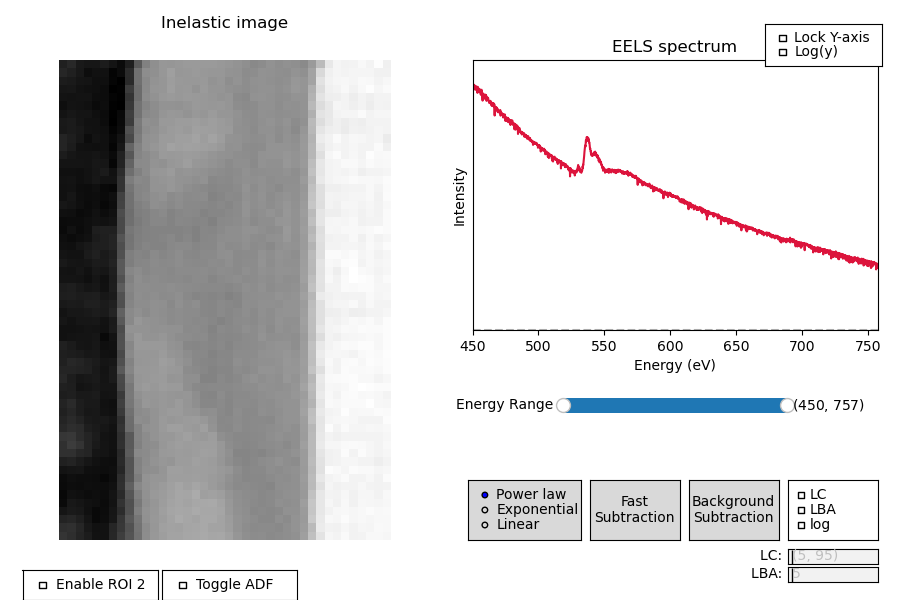

In [32]:
### Start a fit browser
p = EELS.SpectrumImage( si_HL, es_HL, adf=adf )
p.fitbrowser()

In [33]:
## Background Subtraction and Integration Window are stored in "Edge" Object
print( p.edge )

 :, e_bsub (450.0,757.05), e_int (450.0,757.05)


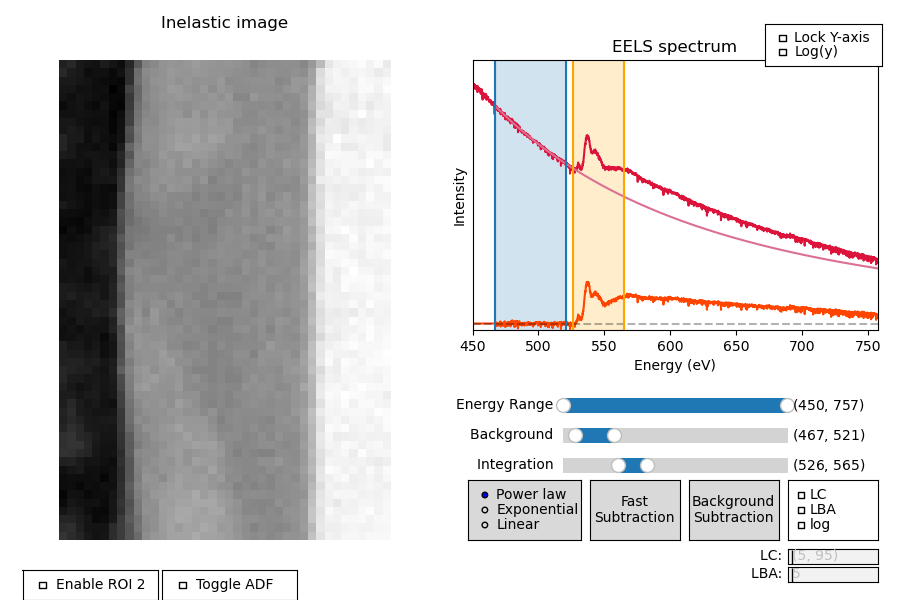

In [34]:
## Alternatively, you can pre-define an edge
edge_O = EELS.eels_edge( label="O-K", e_bsub=(467,521), e_int=(526, 565) )
p.fitbrowser( edge=edge_O)

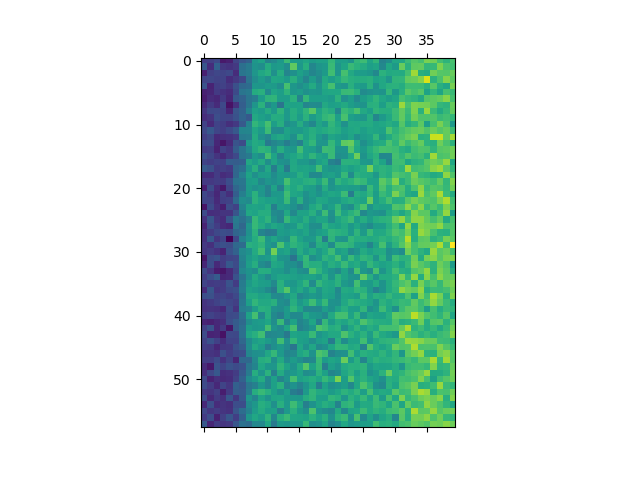

In [37]:
# Integrated inelastic image is stored in p.im_inel
fig, ax = plt.subplots(1); ax.matshow( p.im_inel )

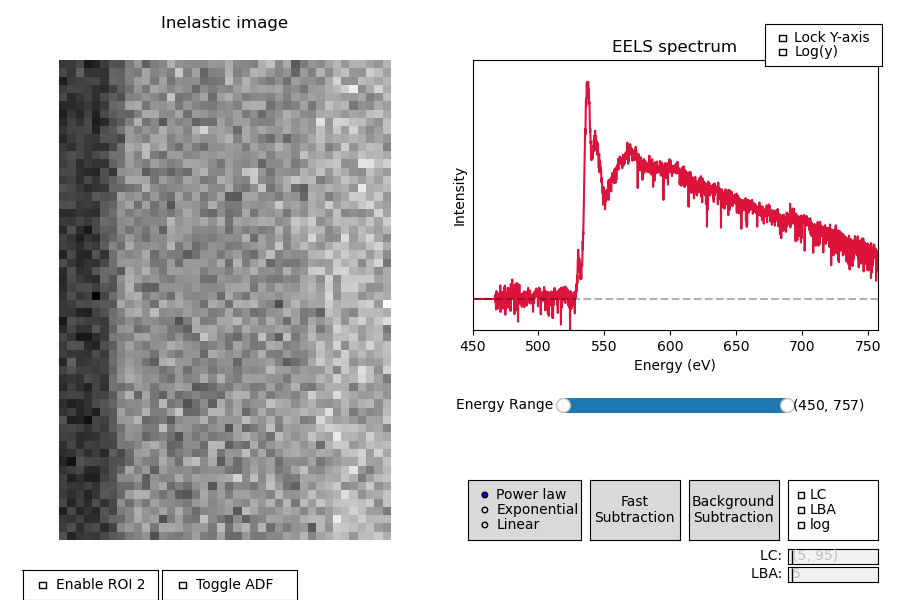

In [38]:
# Background subtrated SI is stored in p.si_bsub
p_bsub = EELS.SpectrumImage( p.si_bsub, p.energy, p.adf )
p_bsub.fitbrowser()